Saving train.zip to train.zip
Number of Dog images: 12500
Number of Cat images: 12500


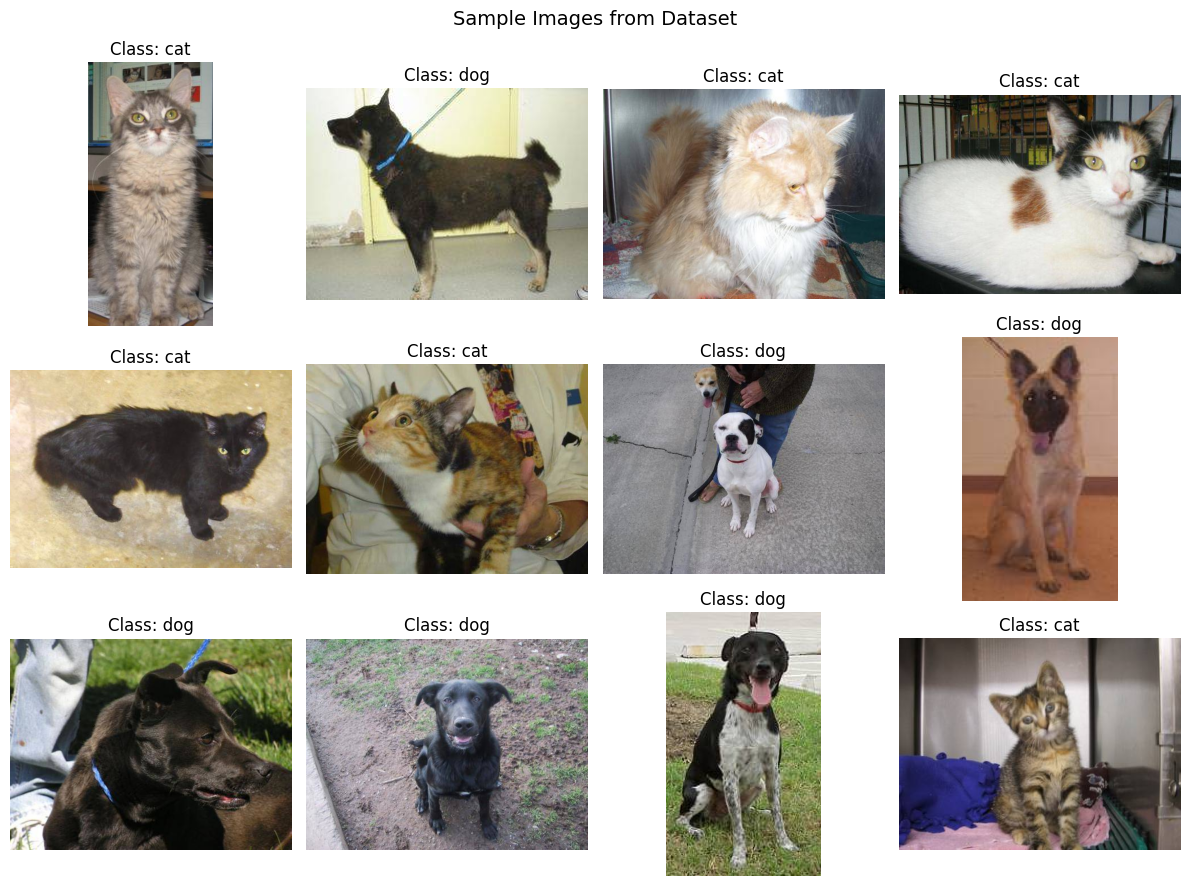

Unique Image Sizes: Counter({(500, 374): 34, (499, 375): 25, (399, 300): 2, (499, 333): 2, (499, 398): 2, (375, 499): 2, (499, 358): 2, (500, 373): 2, (499, 456): 2, (349, 262): 2, (236, 500): 1, (279, 210): 1, (499, 353): 1, (500, 351): 1, (118, 200): 1, (148, 252): 1, (500, 255): 1, (366, 500): 1, (499, 371): 1, (499, 416): 1, (156, 200): 1, (426, 500): 1, (250, 334): 1, (300, 278): 1, (499, 323): 1, (500, 443): 1, (260, 304): 1, (500, 394): 1, (318, 473): 1, (286, 500): 1, (381, 500): 1, (337, 337): 1, (499, 378): 1, (407, 500): 1, (320, 239): 1, (199, 251): 1, (379, 279): 1, (374, 234): 1, (345, 500): 1, (220, 199): 1, (479, 500): 1, (500, 416): 1, (500, 301): 1, (199, 250): 1, (340, 259): 1, (473, 499): 1, (144, 174): 1, (186, 237): 1, (365, 500): 1, (500, 357): 1, (283, 225): 1, (500, 332): 1, (498, 490): 1, (331, 500): 1, (500, 465): 1, (449, 337): 1, (339, 499): 1, (349, 466): 1, (435, 500): 1, (499, 492): 1, (374, 500): 1, (414, 272): 1, (169, 261): 1, (299, 238): 1, (446, 402

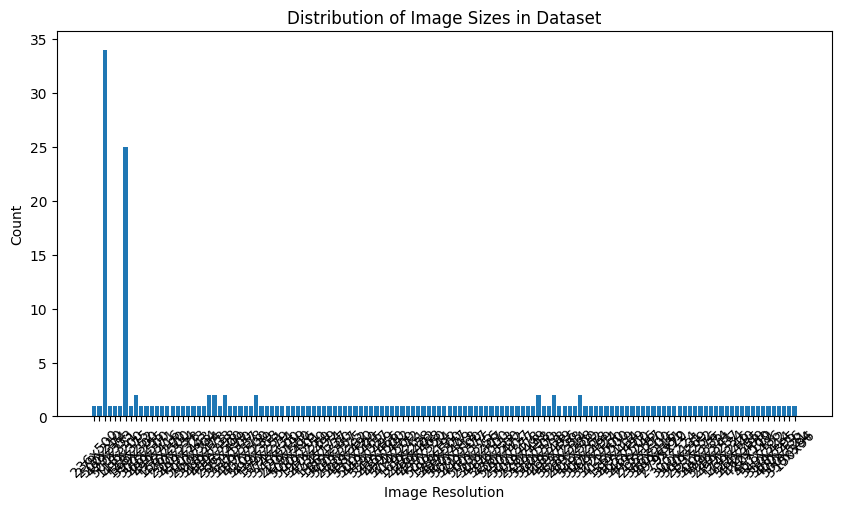

Number of Corrupted Images: 0


In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import cv2
import numpy as np
from collections import Counter
from PIL import Image
from google.colab import files

uploaded = files.upload()


train_zip_path = "train.zip"
extract_path = "/content/train"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

train_path = os.path.join(extract_path, "train")
all_images = os.listdir(train_path)


labels = [img.split(".")[0] for img in all_images]
label_counts = Counter(labels)

print("Number of Dog images:", label_counts["dog"])
print("Number of Cat images:", label_counts["cat"])


fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle("Sample Images from Dataset", fontsize=14)

for i, ax in enumerate(axes.flat):
    img_path = os.path.join(train_path, all_images[i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"Class: {labels[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

image_sizes = []
for img_name in all_images[:200]:
    img_path = os.path.join(train_path, img_name)
    img = Image.open(img_path)
    image_sizes.append(img.size)

unique_sizes = Counter(image_sizes)
print("Unique Image Sizes:", unique_sizes)

sizes, counts = zip(*unique_sizes.items())
plt.figure(figsize=(10, 5))
plt.bar(range(len(sizes)), counts, tick_label=[f"{w}x{h}" for w, h in sizes])
plt.xlabel("Image Resolution")
plt.ylabel("Count")
plt.title("Distribution of Image Sizes in Dataset")
plt.xticks(rotation=45)
plt.show()

corrupted_files = []
for img_name in all_images:
    img_path = os.path.join(train_path, img_name)
    try:
        img = Image.open(img_path)
        img.verify()
    except Exception as e:
        corrupted_files.append(img_name)

print("Number of Corrupted Images:", len(corrupted_files))
if corrupted_files:
    print("Sample Corrupted Image:", corrupted_files[:5])


En este trabajo se hizo a una investigación de tipo exploratoria y descriptiva, ya que se está analizando un dataset de imágenes para observar con su estructura, calidad y características antes de aplicar un modelo de clasificación. Los datos obtenidos dieron como resultado el número de imágenes por clase (perros y gatos), muestras visuales del conjunto, la distribución de tamaños de imagen y la verificación de archivos corruptos. Aunque en esta etapa no llego a haber filtración de datos, si se utiliza de esta misma forma pueden existir posibles riesgos  más adelante ya que, no se dividen bien los datos, especialmente por el uso de nombres de archivo que contienen la clase o si se mezclan imágenes similares entre entrenamiento y validación.